In [228]:
import cv2
import numpy as np
from numpy import shape
import matplotlib.pyplot as plt 
from image_extractor import feature_extract, statistic_analysis
from scipy.stats import skew, kurtosis

main_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/'
# image_dir  = '../input/color-corrected/Color_Corrected_512x512/Agglutinated/image (17).JPG'
# image_dir  = '../input/color-corrected/Color_Corrected_512x512/Brittle/image (1).JPG'
# image_dir = '../input/color-corrected/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = '../input/color-corrected/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (16).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Compartmentalized_Brown/image (3).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (48).JPG'
# image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_Purple/image (43).JPG'

# image_dir = '../input/color-corrected/Color_Corrected_512x512/Plated_Brown/image (5).JPG'

# image_dir = './input/color-corrected/Color_Corrected_512x512/Compartmentalized_Slaty/image (1).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Moldered/image (7).JPG'

# image_dir  = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (30).JPG'

rd = np.random.randint(0,100)
rd = 45
image_dir = main_dir + 'Plated_PartiallyPurple/image (' + str(rd) + ').JPG'
plt.rcParams["figure.figsize"] = (10,6)


In [229]:
image_dir

'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_PartiallyPurple/image (45).JPG'

In [230]:
extractor = feature_extract()
image_bgr = cv2.imread(image_dir)
# extractor.extract(image_bgr)
extractor.pre_process(image_bgr)
# extractor.extract_compress_HSV()

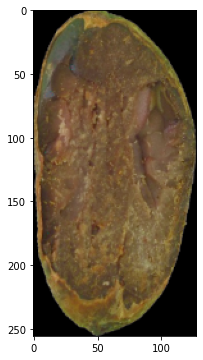

In [231]:
plt.imshow(extractor.image_rgb)
plt.show()

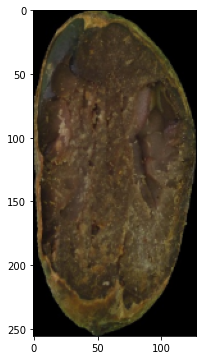

In [232]:
image_rgb = extractor.origin_rgb;
plt.imshow(image_rgb)
plt.show()

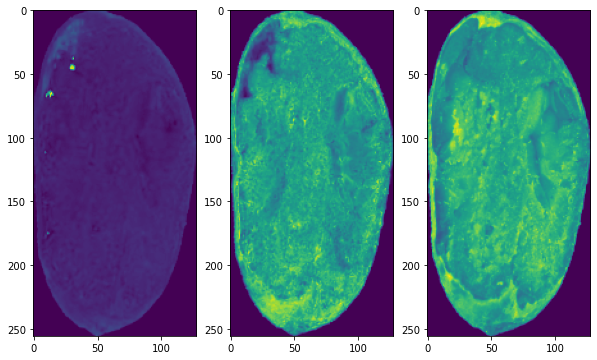

In [233]:
image_hsv = extractor.image_hsv
h, s, v = cv2.split(image_hsv)
plt.subplot(1,3,1)
plt.imshow(h)
plt.subplot(1,3,2)
plt.imshow(s)
plt.subplot(1,3,3)
plt.imshow(v)
plt.show()

In [234]:
def my_thresh(img, range=(120,150)):
    a, b = range
    ret, thh = cv2.threshold(h, a,255, cv2.THRESH_TOZERO)
    ret, thh = cv2.threshold(h, b,255, cv2.THRESH_TOZERO_INV)
    return thh

In [235]:
def my_thresh_inv(img, range=(120,150)):
    a, b = range
    ret, thh = cv2.threshold(h, b,255, cv2.THRESH_TOZERO)
    ret, thh2 = cv2.threshold(h, a,255, cv2.THRESH_TOZERO_INV)
    return thh+thh2

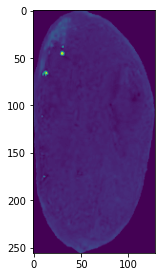

In [236]:
image_hsv = extractor.image_hsv
h, s, v = cv2.split(image_hsv)


thh = my_thresh(h, (128,223))

plt.subplot(1,4,1)
plt.imshow(thh)
# plt.subplot(1,4,2)
# plt.imshow(thr2)
# plt.subplot(1,4,3)
# plt.imshow(thg)
# plt.subplot(1,4,4)
# plt.imshow(thb)
plt.show()

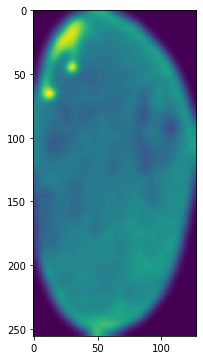

In [237]:
blur = cv2.GaussianBlur(thh, (21,21), 0)
plt.imshow(blur)
plt.show()

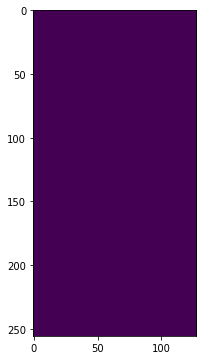

In [238]:
ret, thbin = cv2.threshold(blur, 40, 255, cv2.THRESH_BINARY)
plt.imshow(thbin)
plt.show()

0


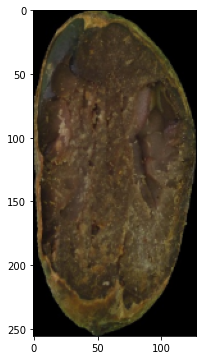

In [239]:
image_rgb = extractor.origin_rgb
contours, hr = cv2.findContours(thbin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
shape = []
stat = []
for cnt in contours:
#         cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (255,255,0), 1)
    x,y,w,h = cv2.boundingRect(cnt)
    # if (x<5) or (x+w>123):
    #     continue
    convexHull = cv2.convexHull(cnt)
    convexhull_area = cv2.contourArea(convexHull)
    if convexhull_area < 49:
        continue
    if len(cnt)<5:
        continue
    if len(convexHull)<5:
        continue

    feature = image_rgb[y:y+h, x:x+w, :]
    stat.append(statistic_analysis(feature))
    shape.append([w,h])
    cv2.drawContours(image_rgb, [convexHull], -1, (255,0,255), 1)

n = len(stat)
print(n)
    
plt.imshow(image_rgb)
plt.show()

In [240]:
print(np.shape(shape))
print(np.shape(stat))
ft = np.concatenate([shape, stat], axis=1)
print(type(ft))
print(np.shape(ft))
ft = ft.tolist()

(0,)
(0,)


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
mean = np.mean(ft, axis=0)
stddev = np.std(ft,axis=0)
skewness = skew(ft,axis=0)
kurtosises = kurtosis(ft,axis=0)